## Predicting Survival on the Titanic using Logistic Regression

Andrew Peabody apeab2@uis.edu

A logistic regression classifier to predict survival on the titanic.   

This model uses the following independent variables to predict the dependent variable survived:
 - Sex
 - Age
 - Passenger Class
 - Number of Siblings/Spouses Aboard
 - Number of Parents/Children Aboard
 
I decided not to include embarkation point based on an analysis post from earlier in the week in which I postulate Passenger Class to be the more likely "true" factor for which initally embarkation point appears to allude.

The overall Logistic AUC for this model is 0.81

In [47]:
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [48]:
#read the Titanic data from the disk into memory
# https://www.kaggle.com/c/titanic/data
df = pd.read_csv("train.csv")

In [49]:
# Create a new dataframe and use the variables as noted in the intro.
X = pd.DataFrame()
X['sex'] = df['Sex']
X['age'] = df['Age']
X['pclass'] = df['Pclass']
X['sibsp'] = df['SibSp']
X['parch'] = df['Parch']
X['survived'] = df['Survived']

In [50]:
#While not ideal, I have decided to use the mean for missing ages as it performed better for logisitic accuracy.
#Interestingly, dropping the age performed better for the original base case accuray...
meanAge = X['age'].mean()
X['age'] = X['age'].fillna(meanAge)

In [51]:
#Survived will be my dependent variable, y.  
y = X['survived']

# Remove from x.
X = X.drop(['survived'], axis=1)

In [52]:
#Transform the data to be categorical for logistic regression without colinear variables.

#While we could repurpose the sec column as categorical, I have decided for clarity to create a new female column.
X['female'] = pd.get_dummies(X.sex)['female']

#Break passenger class into three categorical columns.
X = X.join(pd.get_dummies(df.Pclass, prefix='pclass'))

#Drop the no longer needed and/or colinear variables.
X = X.drop(['pclass_3', 'pclass', 'sex'], axis=1)

In [53]:
#Uncomment for quick visual of the data
#X

In [54]:
#remember to scale our features, as with linear regression
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X= scaler.fit_transform(X)

In [55]:
#build test and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

###  Logistical Model Creation

In [56]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(penalty='l2', C=1)

In [57]:
model.fit(X_train, y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### Logistic Model Accuracy Analysis using AUC score

In [58]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

In [59]:
print "\n\n---Logistic Model---"
logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))
print "Logistic AUC = %2.2f" % logit_roc_auc
print classification_report(y_test, model.predict(X_test) )



---Logistic Model---
Logistic AUC = 0.81
             precision    recall  f1-score   support

          0       0.82      0.89      0.85       105
          1       0.82      0.73      0.77        74

avg / total       0.82      0.82      0.82       179



In [60]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])

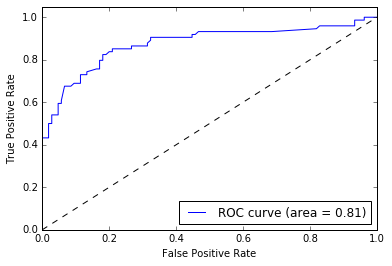

In [61]:
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()